<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20FootBall%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on Yolov3: https://arxiv.org/abs/1804.02767

2. Paper on Yolov3-SPP: https://arxiv.org/abs/1903.08589

3. Paper on Slim-YoloV3: https://arxiv.org/abs/1907.11093

4. Darknet: https://pjreddie.com/darknet/

5. Blog-1 on yolo: https://machinethink.net/blog/object-detection-with-yolo/

6. Blog-2 on yolo: https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088

7. Blog-3 on yolo: https://blog.ekbana.com/training-yolov2-in-a-custom-dataset-6fcf58f65fa2

8. Blog-4 on yolo: https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b

9. Blog-5 on yolo: https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

## Table of contents

### 1. Installation


### 2. Running a pretrained model on test images


### 3. Training a Base Network
  - Training the base network
  - Running validation on base network to get accuracy
  - Running inference to get network speed on CPU


### 4. Pruning the base Network + Finetuning
  - Pruning the trained base network
  - Finetuning the pruned network
  - Running validation on pruned network to get accuracy
  - Running inference to get network speed on CPU


### 5. Second level pruning + Finetuning
  - Pruning the trained base network
  - Finetuning the pruned network
  - Running validation on pruned network to get accuracy
  - Running inference to get network speed on CPU

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/11_slimyolov3/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/7_yolov3/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/7_yolov3/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14ICt2C46XMb8TxYNZDCCC9Gqjyi4kzfh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14ICt2C46XMb8TxYNZDCCC9Gqjyi4kzfh" -O obj_voc_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq obj_voc_trained.zip

In [4]:
f = open("final_weights/classes.txt");
class_list = f.readlines();
f.close();

In [6]:
cfg_path = "final_weights/base.cfg"
weights = "final_weights/base.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=True, input_size=608);

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Weights available


image 1/1 tmp/img2.jpg: 416x608 1 aeroplane
s, 1 person
s, Done. (0.025s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (0.039s)


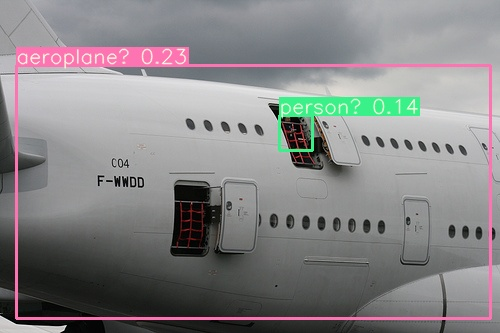

In [69]:
img_path = "final_weights/test/img2.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img2.jpg')

image 1/1 tmp/img8.jpg: 480x608 1 horse
s, 1 person
s, Done. (0.027s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (0.043s)


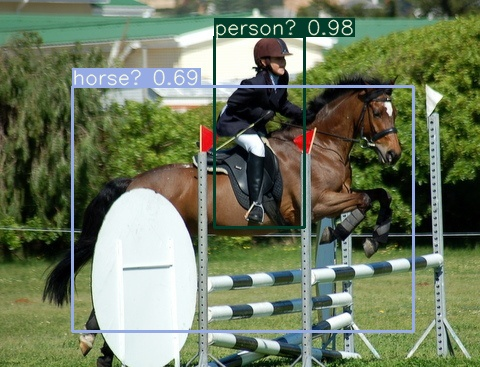

In [70]:
img_path = "final_weights/test/img8.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img8.jpg')

image 1/1 tmp/img6.jpg: 480x608 1 dog
s, Done. (0.025s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (0.043s)


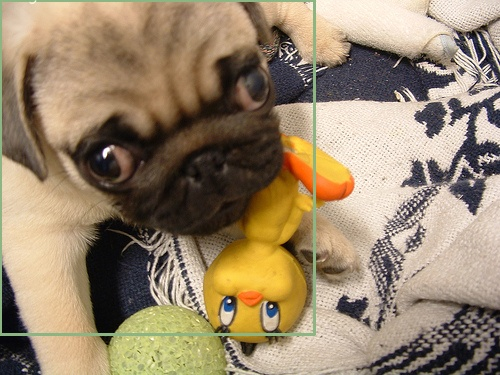

In [71]:
img_path = "final_weights/test/img6.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img6.jpg')

image 1/1 tmp/img4.jpg: 480x608 4 bird
s, Done. (0.026s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (0.044s)


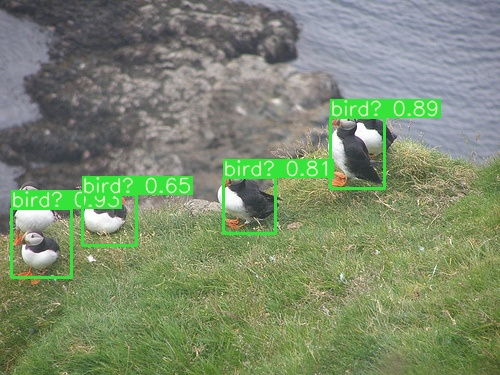

In [72]:
img_path = "final_weights/test/img4.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img4.jpg')

# Dataset
  - Credits: http://host.robots.ox.ac.uk/pascal/VOC/

In [ ]:
! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

In [ ]:
! tar -xvf VOCtrainval_11-May-2012.tar

In [3]:
ls VOCdevkit/VOC2012/

Annotations/  ImageSets/  JPEGImages/  SegmentationClass/  SegmentationObject/


In [4]:
! mkdir dataset

In [5]:
! mkdir dataset/train
! mkdir dataset/val

! mkdir dataset/train/images
! mkdir dataset/train/voc_anno

! mkdir dataset/val/images
! mkdir dataset/val/voc_anno

In [8]:
import os
complete_list = os.listdir("VOCdevkit/VOC2012/Annotations")

In [9]:
import random
random.shuffle(complete_list)
len(complete_list)

17125

In [10]:
train_list = complete_list[:10000];
val_list = complete_list[10000:];

In [13]:
from tqdm import tqdm

for i in tqdm(range(len(train_list))):
    input_img_name = "VOCdevkit/VOC2012/JPEGImages/" + train_list[i].split(".")[0] + ".jpg";
    input_voc_name = "VOCdevkit/VOC2012/Annotations/" + train_list[i];
    
    #print(os.path.isfile(input_img_name));
    #print(os.path.isfile(input_voc_name));
    
    output_img_path = "dataset/train/images/";
    output_voc_path = "dataset/train/voc_anno/";
    
    os.system("cp " + input_img_name + " " + output_img_path);
    os.system("cp " + input_voc_name + " " + output_voc_path);
    
    #break;

100%|██████████| 10000/10000 [01:01<00:00, 162.11it/s]


In [14]:
from tqdm import tqdm

for i in tqdm(range(len(val_list))):
    input_img_name = "VOCdevkit/VOC2012/JPEGImages/" + val_list[i].split(".")[0] + ".jpg";
    input_voc_name = "VOCdevkit/VOC2012/Annotations/" + val_list[i];
    
    #print(os.path.isfile(input_img_name));
    #print(os.path.isfile(input_voc_name));
    
    output_img_path = "dataset/val/images/";
    output_voc_path = "dataset/val/voc_anno/";
    
    os.system("cp " + input_img_name + " " + output_img_path);
    os.system("cp " + input_voc_name + " " + output_voc_path);
    
    #break;

100%|██████████| 7125/7125 [00:43<00:00, 162.10it/s]


In [15]:
import os
import sys
import numpy as np
import pandas as pd

import xmltodict
import json
from tqdm.notebook import tqdm

from pycocotools.coco import COCO

In [16]:
root_dir = "dataset/train/";
img_dir = "images/";
anno_dir = "voc_anno/";

files = os.listdir(root_dir + anno_dir);

combined = [];
for i in tqdm(range(len(files))):
    annoFile = root_dir + "/" + anno_dir + "/" + files[i];
    f = open(annoFile, 'r');
    my_xml = f.read();
    anno = dict(dict(xmltodict.parse(my_xml))["annotation"])
    fname = anno["filename"];
    label_str = "";
    if(type(anno["object"]) == list):
        for j in range(len(anno["object"])):
            obj = dict(anno["object"][j]);
            label = anno["object"][j]["name"];
            bbox = dict(anno["object"][j]["bndbox"])
            x1 = bbox["xmin"];
            y1 = bbox["ymin"];
            x2 = bbox["xmax"];
            y2 = bbox["ymax"];
            if(j == len(anno["object"])-1):
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
            else:        
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label + " ";
    else:
        obj = dict(anno["object"]);
        label = anno["object"]["name"];
        bbox = dict(anno["object"]["bndbox"])
        x1 = bbox["xmin"];
        y1 = bbox["ymin"];
        x2 = bbox["xmax"];
        y2 = bbox["ymax"];
        
        label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
    
    
    combined.append([fname, label_str])
    
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv(root_dir + "/train_labels.csv", index=False);

In [18]:
root_dir = "dataset/val/";
img_dir = "images/";
anno_dir = "voc_anno/";

files = os.listdir(root_dir + anno_dir);

combined = [];
for i in tqdm(range(len(files))):
    annoFile = root_dir + "/" + anno_dir + "/" + files[i];
    f = open(annoFile, 'r');
    my_xml = f.read();
    anno = dict(dict(xmltodict.parse(my_xml))["annotation"])
    fname = anno["filename"];
    label_str = "";
    if(type(anno["object"]) == list):
        for j in range(len(anno["object"])):
            obj = dict(anno["object"][j]);
            label = anno["object"][j]["name"];
            bbox = dict(anno["object"][j]["bndbox"])
            x1 = bbox["xmin"];
            y1 = bbox["ymin"];
            x2 = bbox["xmax"];
            y2 = bbox["ymax"];
            if(j == len(anno["object"])-1):
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
            else:        
                label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label + " ";
    else:
        obj = dict(anno["object"]);
        label = anno["object"]["name"];
        bbox = dict(anno["object"]["bndbox"])
        x1 = bbox["xmin"];
        y1 = bbox["ymin"];
        x2 = bbox["xmax"];
        y2 = bbox["ymax"];
        
        label_str += x1 + " " + y1 + " " + x2 + " " + y2 + " " + label;
    
    
    combined.append([fname, label_str])
    
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv(root_dir + "/train_labels.csv", index=False);

In [19]:
import os
import sys

from PIL import Image
from tqdm.notebook import tqdm

In [20]:
root_dir = "dataset/train/";
img_dir = "images";
anno_file = "train_labels.csv";

labels_dir = "labels";
classes_file = "classes.txt";

labels_dir_relative = root_dir + "/" + labels_dir
if(not os.path.isdir(labels_dir_relative)):
    os.mkdir(labels_dir_relative);
    
import pandas as pd
df = pd.read_csv(root_dir + "/" + anno_file);

columns = df.columns
classes = [];
for i in range(len(df)):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    for j in range(len(tmp)//5):
        label = tmp[j*5 + 4];
        if(label not in classes):
            classes.append(label);
classes = sorted(classes)

f = open(root_dir + "/" + classes_file, 'w');
for i in range(len(classes)):
    f.write(classes[i]);
    f.write("\n");
f.close();


for i in tqdm(range(len(df))):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    fname = labels_dir_relative + "/" + img_file.split(".")[0] + ".txt";
    img = Image.open(root_dir + "/" + img_dir + "/" + img_file);
    width, height = img.size
    
    f = open(fname, 'w');
    for j in range(len(tmp)//5):
        x1 = float(tmp[j*5 + 0]);
        y1 = float(tmp[j*5 + 1]);
        x2 = float(tmp[j*5 + 2]);
        y2 = float(tmp[j*5 + 3]);
        label = tmp[j*5 + 4];
        
        x_c = str(((x1 + x2)/2)/width);
        y_c = str(((y1 + y2)/2)/height);
        w = str((x2 - x1)/width);
        h = str((y2 - y1)/height);
        index = str(classes.index(label));
        
        f.write(index + " " + x_c + " " + y_c + " " + w + " " + h);
        f.write("\n");
    f.close();

In [21]:
root_dir = "dataset/val/";
img_dir = "images";
anno_file = "train_labels.csv";

labels_dir = "labels";
classes_file = "classes.txt";

labels_dir_relative = root_dir + "/" + labels_dir
if(not os.path.isdir(labels_dir_relative)):
    os.mkdir(labels_dir_relative);
    
import pandas as pd
df = pd.read_csv(root_dir + "/" + anno_file);

columns = df.columns
classes = [];
for i in range(len(df)):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    for j in range(len(tmp)//5):
        label = tmp[j*5 + 4];
        if(label not in classes):
            classes.append(label);
classes = sorted(classes)

f = open(root_dir + "/" + classes_file, 'w');
for i in range(len(classes)):
    f.write(classes[i]);
    f.write("\n");
f.close();


for i in tqdm(range(len(df))):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    fname = labels_dir_relative + "/" + img_file.split(".")[0] + ".txt";
    img = Image.open(root_dir + "/" + img_dir + "/" + img_file);
    width, height = img.size
    
    f = open(fname, 'w');
    for j in range(len(tmp)//5):
        x1 = float(tmp[j*5 + 0]);
        y1 = float(tmp[j*5 + 1]);
        x2 = float(tmp[j*5 + 2]);
        y2 = float(tmp[j*5 + 3]);
        label = tmp[j*5 + 4];
        
        x_c = str(((x1 + x2)/2)/width);
        y_c = str(((y1 + y2)/2)/height);
        w = str((x2 - x1)/width);
        h = str((y2 - y1)/height);
        index = str(classes.index(label));
        
        f.write(index + " " + x_c + " " + y_c + " " + w + " " + h);
        f.write("\n");
    f.close();

## Training a base detector

In [ ]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector()

In [ ]:
img_dir = "dataset/train/images/";
label_dir = "dataset/train/labels/";
class_list_file = "dataset/train/classes.txt";
gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=16, img_size=608)
gtf.set_val_dataset(img_dir, label_dir)

In [ ]:
gtf.set_hyperparams(optimizer="sgd", lr=0.0002324, multi_scale=False, evolve=False, sparsity=0.0001);

In [ ]:
gtf.Train(num_epochs=100);

## Running validation on base detector

In [ ]:
! mkdir final_weights
! cp yolov3-spp3.cfg final_weights/base.cfg
! cp weights/best.pt final_weights/base.pt

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [5]:
cfg_path = "final_weights/base.cfg"
weights = "final_weights/base.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=True, input_size=608);

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Weights available


In [6]:
img_dir = "dataset/val/images/";
label_dir = "dataset/val/labels/";
gtf.Validate(img_dir, label_dir, class_list, batch_size=16, img_size=608, conf_thres=0.001);

               Class    Images   Targets         P         R       mAP        F1:   0%|          | 0/446 [00:00<?, ?it/s]

Validation on device -  cuda:0


               Class    Images   Targets         P         R       mAP        F1: 100%|██████████| 446/446 [08:04<00:00,  1.09s/it]


                 all  7.12e+03  1.69e+04    0.0434     0.794     0.476     0.081
          aeroplane
  7.12e+03       425    0.0336     0.819     0.625    0.0645
            bicycle
  7.12e+03       339    0.0323     0.876     0.358    0.0623
               bird
  7.12e+03       503    0.0347     0.779     0.628    0.0665
               boat
  7.12e+03       424    0.0193     0.649     0.252    0.0375
             bottle
  7.12e+03       611   0.00559     0.681     0.248    0.0111
                bus
  7.12e+03       285    0.0373     0.846      0.57    0.0715
                car
  7.12e+03       999    0.0114     0.773     0.414    0.0225
                cat
  7.12e+03       529      0.12      0.94     0.798     0.212
              chair
  7.12e+03  1.33e+03    0.0192     0.678     0.282    0.0373
                cow
  7.12e+03       353    0.0769     0.779     0.503      0.14
        diningtable
  7.12e+03       362    0.0263      0.68     0.336    0.0507
                dog
  7.12e+

## Runing CPU inference on base dtecetor

In [7]:
import os
lst = os.listdir("dataset/train/images")

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [5]:
cfg_path = "final_weights/base.cfg"
weights = "final_weights/base.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=False, input_size=608);

Using CPU

Weights available


image 1/1 tmp/2010_003689.jpg: 608x608 1 bicycle
s, 2 person
s, Done. (1.578s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (1.599s)


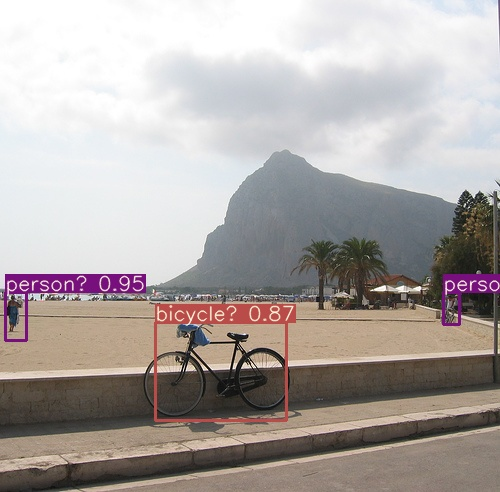

In [15]:
img_path = "dataset/train/images/" + lst[5];
gtf.Predict(img_path, conf_thres=0.14, iou_thres=0.5);
Image(filename="output/" + lst[5])

## Pruning the network and re-training

In [1]:
import os
import sys
sys.path.append("11_slimyolov3/lib");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
gtf.prune_weights("final_weights/base.cfg", 
                  "final_weights/best.pt",
                  "pruned1.cfg", 
                  "pruned1.pt", 
                  img_size=608, 
                  overall_ratio=0.5, 
                  per_layer_ratio=0.1);

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

------------------------------------------------------------

layer: 0
layer index: 0 	 total channel: 32 	 remaining channel: 21
layer: convolutional
layer: 1
layer index: 1 	 total channel: 64 	 remaining channel: 30
layer: convolutional
layer: 2
layer index: 2 	 total channel: 32 	 remaining channel: 14
layer: convolutional
layer: 3
layer index: 3 	 total channel: 64 	 remaining channel: 25
layer: convolutional
layer: 4
from layer  1
layer: shortcut
layer: 5
layer index: 5 	 total channel: 128 	 remaining channel: 83
layer: convolutional
layer: 6
layer index: 6 	 total channel: 64 	 remaining channel: 6
layer: convolutional
layer: 7
layer index: 7 	 total channel: 128 	 remaining channel: 29
layer: convolutional
layer: 8
from layer  5
layer: shortcut
layer: 9
layer index: 9 	 total channel: 64 	 remaining channel: 31
layer: convolutional
layer: 10
layer index: 10 	 total channel: 128 	 remai

[Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (Conv2d): Conv2d(3, 21, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (1): Sequential(
      (Conv2d): Conv2d(21, 43, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(43, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (2): Sequential(
      (Conv2d): Conv2d(43, 14, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (BatchNorm2d): BatchNorm2d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (3): Sequential(
      (Conv2d): Conv2d(14, 43, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

layer:  113 convolutional
idx1:  256 , idx2:  128
layer index:  113 idx1:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [ ]:
img_dir = "dataset/train/images/";
label_dir = "dataset/train/labels/";
class_list_file = "dataset/train/classes.txt";
gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=16, img_size=608)
gtf.set_val_dataset(img_dir, label_dir)

In [ ]:
gtf.set_hyperparams(optimizer="sgd", lr=0.0002324, multi_scale=False, evolve=False, sparsity=0.0001);

In [ ]:
gtf.set_finetune_params("weights/pruned1.cfg", 
                          "weights/pruned1.pt");

In [ ]:
gtf.Train(num_epochs=100, finetune=True)

## Running validation on level-1 pruned detector

In [1]:
! cp weights/pruned1.cfg final_weights/pruned1.cfg
! cp weights/best.pt final_weights/pruned1.pt

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [5]:
cfg_path = "final_weights/pruned1.cfg"
weights = "final_weights/pruned1.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=True, input_size=608);

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Weights available


In [6]:
img_dir = "dataset/val/images/";
label_dir = "dataset/val/labels/";
gtf.Validate(img_dir, label_dir, class_list, batch_size=16, img_size=608, conf_thres=0.001);

               Class    Images   Targets         P         R       mAP        F1:   0%|          | 0/446 [00:00<?, ?it/s]

Validation on device -  cuda:0


               Class    Images   Targets         P         R       mAP        F1: 100%|██████████| 446/446 [08:25<00:00,  1.13s/it]


                 all  7.12e+03  1.69e+04    0.0288     0.727     0.333    0.0548
          aeroplane
  7.12e+03       425    0.0292     0.784     0.475    0.0564
            bicycle
  7.12e+03       339    0.0237     0.817     0.268     0.046
               bird
  7.12e+03       503    0.0155     0.666     0.297    0.0304
               boat
  7.12e+03       424    0.0106     0.531     0.155    0.0209
             bottle
  7.12e+03       611   0.00548     0.635     0.211    0.0109
                bus
  7.12e+03       285    0.0269     0.821      0.47    0.0521
                car
  7.12e+03       999     0.012     0.742     0.289    0.0235
                cat
  7.12e+03       529    0.0695     0.883     0.555     0.129
              chair
  7.12e+03  1.33e+03    0.0143     0.621     0.198     0.028
                cow
  7.12e+03       353    0.0372     0.652     0.292    0.0703
        diningtable
  7.12e+03       362    0.0202     0.627     0.227     0.039
                dog
  7.12e+

## Running CPU inference on level-1 pruned detector

In [1]:
import os
lst = os.listdir("dataset/train/images")

In [2]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [3]:
from infer_detector import Infer

In [4]:
gtf = Infer();

In [5]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [6]:
cfg_path = "final_weights/pruned1.cfg"
weights = "final_weights/pruned1.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=False, input_size=608);

Using CPU

Weights available


image 1/1 tmp/2010_003689.jpg: 608x608 1 bicycle
s, 1 person
s, Done. (1.350s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (1.370s)


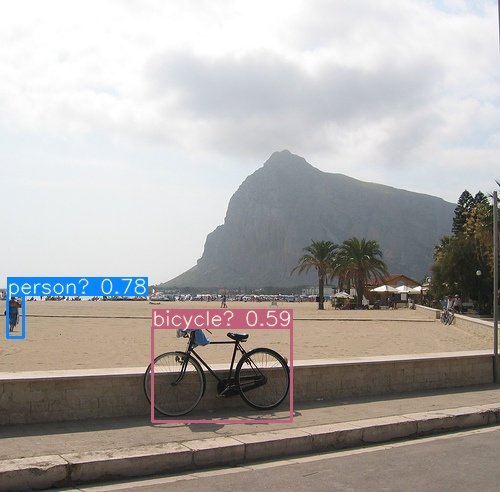

In [9]:
img_path = "dataset/train/images/" + lst[5];
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename="output/" + lst[5])

# Re-pruning the previous network and retraining

In [1]:
import os
import sys
sys.path.append("11_slimyolov3/lib");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [ ]:
gtf.prune_weights("final_weights/pruned1.cfg", 
                  "final_weights/pruned1.pt",
                  "pruned2.cfg", 
                  "pruned2.pt", 
                  img_size=608, 
                  overall_ratio=0.5, 
                  per_layer_ratio=0.1);

In [ ]:
img_dir = "dataset/train/images/";
label_dir = "dataset/train/labels/";
class_list_file = "dataset/train/classes.txt";
gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=16, img_size=608)
gtf.set_val_dataset(img_dir, label_dir)

In [ ]:
gtf.set_hyperparams(optimizer="sgd", lr=0.0002324, multi_scale=False, evolve=False, sparsity=0.0001);

In [ ]:
gtf.set_finetune_params("weights/pruned2.cfg", 
                          "weights/pruned2.pt");

In [ ]:
gtf.Train(num_epochs=100, finetune=True)

## Running validation on level-2 pruned detector

In [1]:
! cp weights/pruned2.cfg final_weights/pruned2.cfg
! cp weights/best.pt final_weights/pruned2.pt

In [2]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [3]:
from infer_detector import Infer

In [4]:
gtf = Infer();

In [5]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [6]:
cfg_path = "final_weights/pruned2.cfg"
weights = "final_weights/pruned2.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=True, input_size=608);

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Weights available


In [7]:
img_dir = "dataset/val/images/";
label_dir = "dataset/val/labels/";
gtf.Validate(img_dir, label_dir, class_list, batch_size=16, img_size=608, conf_thres=0.001);

               Class    Images   Targets         P         R       mAP        F1:   0%|          | 0/446 [00:00<?, ?it/s]

Validation on device -  cuda:0


               Class    Images   Targets         P         R       mAP        F1: 100%|██████████| 446/446 [08:36<00:00,  1.16s/it]


                 all  7.12e+03  1.69e+04    0.0265     0.715     0.326    0.0507
          aeroplane
  7.12e+03       425    0.0202     0.779     0.428    0.0393
            bicycle
  7.12e+03       339    0.0213     0.794     0.256    0.0415
               bird
  7.12e+03       503    0.0112     0.622     0.246    0.0221
               boat
  7.12e+03       424   0.00973     0.564     0.157    0.0191
             bottle
  7.12e+03       611   0.00605     0.632     0.181     0.012
                bus
  7.12e+03       285    0.0265       0.8     0.443    0.0513
                car
  7.12e+03       999    0.0127     0.721     0.296    0.0249
                cat
  7.12e+03       529    0.0663     0.879     0.593     0.123
              chair
  7.12e+03  1.33e+03    0.0158     0.592     0.181    0.0308
                cow
  7.12e+03       353    0.0293     0.632       0.3    0.0561
        diningtable
  7.12e+03       362    0.0223     0.599     0.251     0.043
                dog
  7.12e+

## Running CPU inference on level-2 pruned detector

In [16]:
import os
lst = os.listdir("dataset/train/images")

In [9]:
import os
import sys
from IPython.display import Image
sys.path.append("11_slimyolov3/lib");

In [10]:
from infer_detector import Infer

In [11]:
gtf = Infer();

In [12]:
f = open("dataset/train/classes.txt");
class_list = f.readlines();
f.close();

In [13]:
cfg_path = "final_weights/pruned2.cfg"
weights = "final_weights/pruned2.pt";
gtf.Model(cfg_path, class_list, weights, use_gpu=False, input_size=608);

Using CPU

Weights available


image 1/1 tmp/2010_003689.jpg: 608x608 1 bicycle
s, 1 person
s, Done. (1.103s)
Results saved to /home/ubuntu/Desktop/slim_yolov3_test/try4/output
Done. (1.124s)


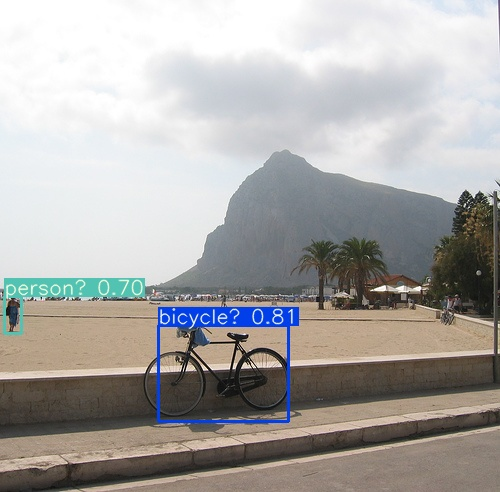

In [17]:
img_path = "dataset/train/images/" + lst[5];
gtf.Predict(img_path, conf_thres=0.2, iou_thres=0.5);
Image(filename="output/" + lst[5])

# Summary


| S.No. |         Weights         | Parameters (Num) |  mAP  | Inference Time (Sec) (on 8-core CPU) |
|:-----:|:-----------------------:|:----------------:|:-----:|:------------------------------------:|
|   1   |           Base          |    6.39536e+07   | 0.476 |                 1.578                |
|       |                         |                  |       |                                      |
|   2   |  Pruned-1 (First level) |    3.52239e+07   | 0.333 |                 1.351                |
|       |                         |                  |       |                                      |
|   3   | Pruned-2 (Second level) |    2.37825e+07   | 0.326 |                 1.103                |
|       |                         |                  |       |                                      |